**Import ticker first.**

In [ ]:
import pandas as pd

nasdaq_path = '/content/drive/MyDrive/For Python/nasdaq_screener.csv'
nyse_path = '/content/drive/MyDrive/For Python/nyse_screener.csv'

nasdaq_df = pd.read_csv(nasdaq_path)
nyse_df = pd.read_csv(nyse_path)

**Change the symbol.**

In [ ]:
nasdaq_df['Symbol'] = nasdaq_df['Symbol'].str.replace('/', '-')
nasdaq_df['Symbol'] = nasdaq_df['Symbol'].str.replace('^', '-P')
nasdaq_df['Symbol'] = nasdaq_df['Symbol'].str.strip()


nyse_df['Symbol'] = nyse_df['Symbol'].str.replace('/', '-')
nyse_df['Symbol'] = nyse_df['Symbol'].str.replace('^', '-P')
nyse_df['Symbol'] = nyse_df['Symbol'].str.strip()

**Import NYSE data from yfinance.**

In [ ]:
import yfinance as yf


nyse_stocks = yf.download(list(nyse_df['Symbol']), start='2019-01-01', end='2023-12-31')

[*********************100%%**********************]  2818 of 2818 completed
ERROR:yfinance:
48 Failed downloads:
ERROR:yfinance:['WRB-PF', 'F-PB', 'F-PD', 'BC-PB', 'BC-PA', 'WRB-PG', 'SFB', 'BC-PC', 'NEE-PN', 'CNO-PA', 'PBI-PB', 'F-PC', 'GL-PD', 'WRB-PH']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:['MITN', 'AHR', 'NCDL', 'AUNA', 'RDDT', 'ATHS', 'GEV', 'CLBR', 'PSBD', 'ALB-PA', 'O-P', 'HAFN', 'KIM-PN', 'MGRE', 'BEPJ', 'SOLV', 'SYF-PB', 'OBDE', 'PACS', 'ULS', 'MFAN', 'MSDL', 'ECCF', 'DXYZ', 'ANRO', 'EICC', 'TBBB', 'SDHC', 'RWTN', 'AS']: Exception("%ticker%: Data doesn't exist for startDate = 1546318800, endDate = 1703998800")
ERROR:yfinance:['ANF', 'EAI', 'MER-PK', 'EMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-01-01 -> 2023-12-31)')


In [ ]:
nyse = nyse_stocks['Adj Close']

**Import NASDAQ data from yfinance.**

In [ ]:
symbol_list = nasdaq_df['Symbol']

symbol_list = [x for x in symbol_list if isinstance(x, str)]

In [ ]:
nasdaq_stocks = yf.download(symbol_list, start='2019-01-01', end='2023-12-31')

[*********************100%%**********************]  4049 of 4049 completed
ERROR:yfinance:
428 Failed downloads:
ERROR:yfinance:['MTEKW', 'BREZR', 'PLAOW', 'PLMIW', 'AISPW', 'NCNCW', 'RCRTW', 'NIOBW', 'ADTHW', 'SAITW', 'ADSEW', 'PRENW', 'CDTTW', 'AENTW', 'PIIIW', 'BOWNR', 'ADNWW', 'LGHLW', 'BOCNW', 'GROMW', 'RMGCW', 'DBGIW', 'COEPW', 'KPLTW', 'SLDPW', 'SQFTW', 'MDAIW', 'SLAMW', 'ARRWW', 'FATBW', 'AVPTW', 'CINGW', 'OXBRW', 'GCMGW', 'BLACR', 'CORZW', 'KVACW', 'DHAIW', 'BRSHW', 'BAYAR', 'ZLSWW', 'CXAIW', 'BCTXW', 'DHACW', 'XFINW', 'BWAQW', 'ATNFW', 'BNAIW', 'SHFSW', 'OCSAW', 'KITTW', 'ECXWW', 'LEXXW', 'BENFW', 'BUJAR', 'OCEAW', 'CLRCW', 'MAPSW', 'ALSAW', 'UKOMW', 'DECAW', 'IRAAW', 'AEAEW', 'BROGW', 'EDBLW', 'BFRIW', 'GBBKR', 'KWESW', 'SPKLW', 'SWAGW', 'LCFYW', 'ARKOW', 'CITEW', 'FREEW', 'SHOTW', 'BREZW', 'JFBRW', 'BNIXW', 'CSSEL', 'SCLXW', 'HOFVW', 'AOGOW', 'CLBTW', 'BCDAW', 'STSSW', 'IROHW', 'PBMWW', 'AIRJW', 'TVGNW', 'MSSAW', 'SVIIW', 'CRESW', 'SBFMW', 'HUBCZ', 'AGBAW', 'CCTSW', 'EVGRW'

In [ ]:
nasdaq = nasdaq_stocks['Adj Close']

**Combine both markets.**

In [ ]:
all_stocks = pd.merge(nyse, nasdaq, left_index = True, right_index = True, how = 'outer')

In [ ]:
#all_stocks.to_csv('all_stocks.csv')

In [ ]:
import pandas as pd

all_stocks = pd.read_csv('/content/drive/MyDrive/For Python/all_stocks.csv', index_col = 'Date', parse_dates=['Date'])

**Compute return.**

In [ ]:
all_stocks_pct_change = all_stocks.pct_change()
all_stocks_pct_change = all_stocks_pct_change.drop(all_stocks_pct_change.index[0])

In [ ]:
#all_stocks_pct_change.to_csv('all_stocks_pct_change.csv')

In [ ]:
import pandas as pd

all_stocks_pct_change = pd.read_csv('/content/drive/MyDrive/For Python/all_stocks_pct_change.csv', index_col = 'Date', parse_dates=['Date'])

**Check null value.**

In [ ]:
all_stocks_pct_change.isna().sum().sort_values(ascending = False)

ALAB     1257
PIIIW    1257
HAO      1257
MITN     1257
PFTAW    1257
         ... 
TGNA        0
TGLS        0
TGI         0
TG          0
ZYXI        0
Length: 6867, dtype: int64

In [ ]:
cleaned_df = all_stocks_pct_change.dropna(axis='columns', thresh=len(all_stocks_pct_change))
cleaned_df.isna().sum().sort_values(ascending = False)

A        0
FGFPP    0
FIBK     0
FISI     0
FITB     0
        ..
NXN      0
NXP      0
NXRT     0
NYCB     0
ZYXI     0
Length: 4190, dtype: int64

**Check 0 value in series.**

In [ ]:
(cleaned_df == 0).sum().sort_values(ascending = False)

WSO-B    1031
BIO-B    1009
ATXG      929
LSXMB     920
GJR       849
         ... 
PAYC        0
RNR         0
WING        0
PH          0
XOM         0
Length: 4190, dtype: int64

**Plot to see the 0 return.**

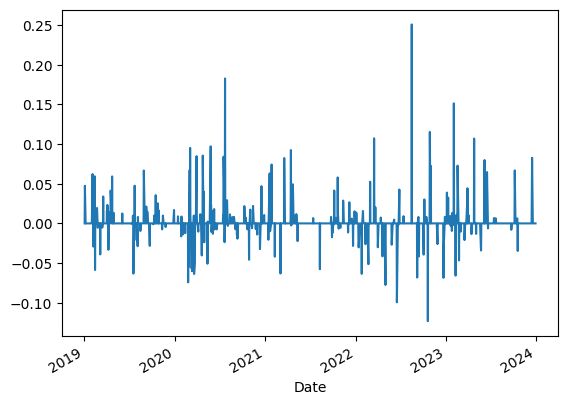

In [ ]:
import matplotlib.pyplot as plt

cleaned_df['WSO-B'].plot()
plt.show()

**Use monthly return to reduce randomness.**

In [ ]:
import numpy as np

def geometric_mean(arr):
    return np.prod(1 + np.array(arr)) - 1

month_cleaned_df = cleaned_df.resample('M').apply(geometric_mean)

In [ ]:
(month_cleaned_df == 0).sum().sort_values(ascending = False)

ATXG      40
NCV-PA    29
IVT       21
THRY      18
CULL      15
          ..
OGE        0
OGS        0
OHI        0
OI         0
ZYXI       0
Length: 4190, dtype: int64

**Drop return 0, as it will cause a decrease in prediction accuracy..**

In [ ]:
zero_in_column = month_cleaned_df.eq(0).any()

columns_with_zero = zero_in_column[zero_in_column].index

noo_nona_month_df = month_cleaned_df.drop(columns=columns_with_zero)
noo_nona_month_df

,A,AA,AAP,AAT,AB,ABBV,ABEV,ABG,ABM,ABR,...,ZIONO,ZIONP,ZKIN,ZLAB,ZS,ZTEK,ZUMZ,ZVRA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,0.157711,0.131098,0.008105,0.092621,0.118078,-0.089154,0.145238,0.037140,0.093031,0.174853,...,0.123282,0.023416,0.031847,0.210314,0.215021,3.666666e-01,2.951070e-01,0.318182,0.084411,0.384083
2019-02-28,0.044576,-0.006065,0.016206,0.011644,-0.024107,-0.013078,-0.058212,0.016136,0.042995,0.104780,...,-0.051326,-0.004417,-0.135802,0.067803,0.027083,-2.439022e-02,-2.794172e-02,-0.137931,-0.050847,0.240000
2019-03-31,0.011833,-0.045424,0.054471,0.062204,-0.008239,0.017037,-0.050773,-0.033849,0.019349,0.002318,...,-0.001495,0.018190,0.107143,0.023942,0.427738,-3.000000e-01,7.692252e-03,-0.257778,0.070106,-0.092742
2019-04-30,-0.021392,-0.052557,-0.024688,0.007196,0.021461,-0.001829,0.095349,0.155998,0.049621,0.053200,...,0.037065,0.041852,0.064516,-0.096916,-0.036938,3.571425e-02,6.990759e-02,-0.104790,0.177997,0.237778
2019-05-31,-0.145860,-0.205772,-0.068062,-0.017320,-0.063055,-0.033757,-0.050956,-0.074707,-0.045299,-0.079552,...,-0.017973,-0.025775,-0.163636,-0.016510,0.004685,-3.448273e-02,-2.572286e-01,0.070234,-0.002623,0.310593
2019-06-30,0.113647,0.104766,-0.005160,0.044563,0.093049,-0.052014,0.044743,0.136811,0.103448,-0.015435,...,-0.001119,-0.003185,0.031159,0.330408,0.116713,-1.785714e-01,3.195146e-01,0.093750,0.157286,0.231507
2019-07-31,-0.068397,-0.039300,-0.022707,-0.015280,0.015141,-0.069914,0.128480,0.091771,0.057021,0.005776,...,0.024645,-0.007321,-0.114547,-0.078864,0.099556,4.347822e-02,-5.095785e-02,-0.280000,0.038636,-0.074527
2019-08-31,0.024492,-0.202757,-0.084241,0.009914,-0.044450,-0.013209,-0.138520,0.024109,-0.114755,0.053707,...,0.019515,0.039046,0.206349,0.015255,-0.184289,4.166669e-02,4.884938e-02,-0.255556,0.165864,0.074519
2019-09-30,0.079945,0.119353,0.199453,0.003362,0.037836,0.151810,0.017621,0.085154,-0.025228,0.044622,...,0.000363,0.001253,-0.190789,-0.007973,-0.312482,2.000000e-01,2.193996e-01,-0.265458,-0.069069,0.063759


**Check the S.D. and return.**

In [ ]:
columns_noo_nona = noo_nona_month_df.columns

In [ ]:
df_cal_return = all_stocks[columns_noo_nona].iloc[[0,-1],:]
df_cal_return

Ticker,A,AA,AAP,AAT,AB,ABBV,ABEV,ABG,ABM,ABR,...,ZIONO,ZIONP,ZKIN,ZLAB,ZS,ZTEK,ZUMZ,ZVRA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,64.262276,25.591524,153.790192,36.007309,20.575077,74.481514,3.818333,68.120003,29.496973,6.065829,...,21.395876,22.122000,1.57,22.299999,39.810001,0.30,19.620001,31.68,14.69,2.627273
2023-12-29,139.029999,33.877167,61.029999,22.510000,31.030001,154.970001,2.800000,224.970001,44.830002,14.692882,...,25.299999,20.000099,0.98,27.330000,221.559998,1.08,20.340000,6.55,10.39,10.890000


**Check that both return and S.D. have the same column.**

In [ ]:
print(df_cal_return.columns.equals(noo_nona_month_df.columns))

True


**Check the return vs S.D.**

In [ ]:
four_years_return = (df_cal_return.iloc[1,:] - df_cal_return.iloc[0,:]) / df_cal_return.iloc[0,:]

In [ ]:
monthly_sd = noo_nona_month_df.std()

In [ ]:
four_years_return.name = 'Four-Years Return'
monthly_sd.name = 'Monthly Standard Deviation'


merge_df = pd.merge(four_years_return, monthly_sd, left_index=True, right_index=True)
merge_df['Yearly Standard Deviation'] = merge_df['Monthly Standard Deviation'] * (21) ** (1/2)

**Check the outlier of the S.D.**

Ticker
CELH    46.408697
CHRD    29.005415
AXSM    28.697759
SCWO    27.399999
ENPH    25.857723
SAVA    23.467391
SMCI    17.825166
AEHR    16.227274
QIPT    14.906251
ELF     14.740457
Name: Four-Years Return, dtype: float64


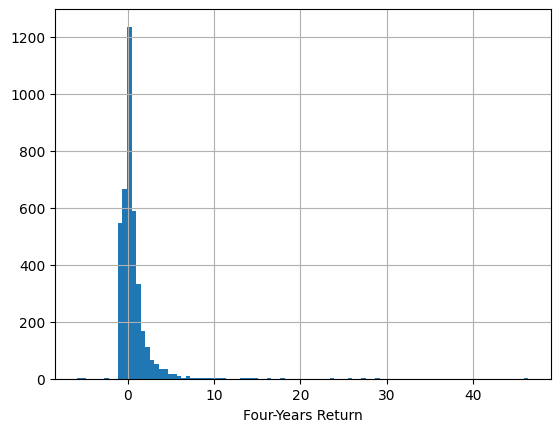

In [ ]:
print(merge_df['Four-Years Return'].sort_values(ascending=False).head(10))
plt.grid(True)
plt.hist(merge_df['Four-Years Return'], bins = 100)
plt.xlabel('Four-Years Return')
plt.show()

**Have some outliers.**

**Check the outlier of the return.**

Ticker
CHRD    183.347510
PRTG     55.043099
PHUN     12.063645
KOSS     10.464378
DNTH     10.252677
WKSP     10.166365
GME       9.684014
BTCS      9.476806
DRIO      9.291056
UONE      8.630765
Name: Yearly Standard Deviation, dtype: float64


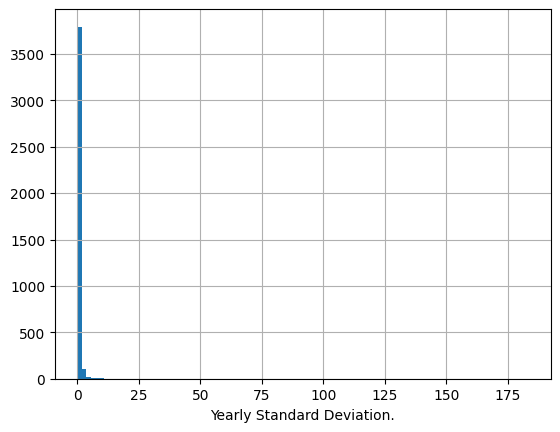

In [ ]:
print(merge_df['Yearly Standard Deviation'].sort_values(ascending=False).head(10))
plt.grid(True)
plt.hist(merge_df['Yearly Standard Deviation'], bins = 100)
plt.xlabel('Yearly Standard Deviation.')
plt.show()

**The same as return.**

**Use iqr to to drop the outliers.**

In [ ]:
def iqr_for_r(x):
  sorted_data = sorted(merge_df['Four-Years Return'])
  q1 = sorted_data[int(len(sorted_data) * 0.25)]
  q3 = sorted_data[int(len(sorted_data) * 0.75)]
  iqr = q3 - q1

  return (q1 - 1.5 * iqr <= x <= q3 + 1.5 * iqr) * 1


def iqr_for_sd(x):
  sorted_data = sorted(merge_df['Yearly Standard Deviation'])
  q1 = sorted_data[int(len(sorted_data) * 0.25)]
  q3 = sorted_data[int(len(sorted_data) * 0.75)]
  iqr = q3 - q1

  return (q1 - 1.5 * iqr <= x <= q3 + 1.5 * iqr) * 1


merge_df['r_not_outlier'] = merge_df['Four-Years Return'].apply(iqr_for_r)
merge_df['sd_not_outlier'] = merge_df['Yearly Standard Deviation'].apply(iqr_for_sd)
merge_df['both'] = merge_df['r_not_outlier'] + merge_df['sd_not_outlier']
no_out_merge = merge_df[merge_df['both'] == 2]

**After filter the outlier.**

Ticker
RGEN    2.478429
TER     2.467629
PRTA    2.460952
WSO     2.450631
ACM     2.445297
Name: Four-Years Return, dtype: float64


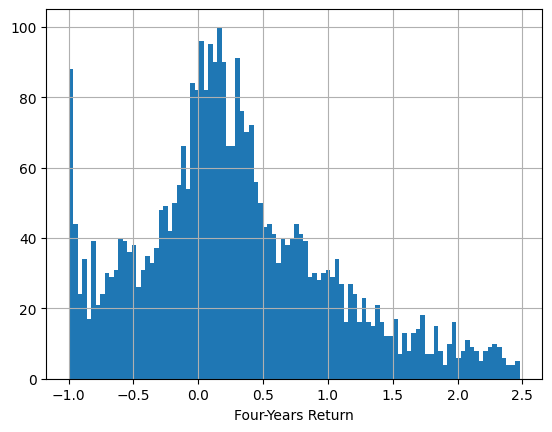

In [ ]:
print(no_out_merge['Four-Years Return'].sort_values(ascending=False).head(5))
plt.grid(True)
plt.hist(no_out_merge['Four-Years Return'], bins = 100)
plt.xlabel('Four-Years Return')
plt.show()

Ticker
BGFV    1.476010
MOGO    1.474745
MYMD    1.471188
KIRK    1.469313
CARM    1.468496
Name: Yearly Standard Deviation, dtype: float64


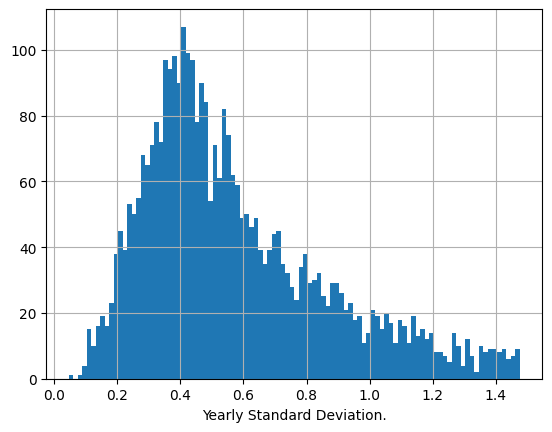

In [ ]:
print(no_out_merge['Yearly Standard Deviation'].sort_values(ascending=False).head(5))
plt.grid(True)
plt.hist(no_out_merge['Yearly Standard Deviation'], bins = 100)
plt.xlabel('Yearly Standard Deviation.')
plt.show()

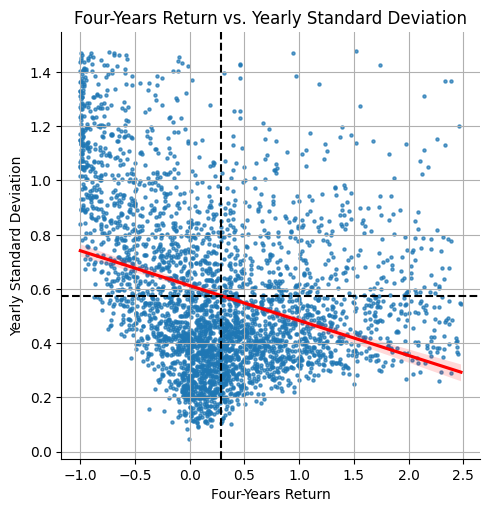

In [ ]:
import seaborn as sns


sns.lmplot(x='Four-Years Return', y='Yearly Standard Deviation', data=no_out_merge, scatter_kws={'alpha':0.7, 's':5}, line_kws={'color': 'red'})
plt.title('Four-Years Return vs. Yearly Standard Deviation')
plt.xlabel('Four-Years Return')
plt.ylabel('Yearly Standard Deviation')

plt.axvline(x=no_out_merge['Four-Years Return'].mean(), linestyle='--', color='black', label='Mean Return')
plt.axhline(y=no_out_merge['Yearly Standard Deviation'].mean(), linestyle='--', color='black', label='Mean Standard Deviation')

plt.grid(True)
plt.show()

**Check outlier from noo_nona_month_df.**

In [ ]:
noo_nona_month_df

Ticker,A,AA,AAP,AAT,AB,ABBV,ABEV,ABG,ABM,ABR,...,ZIONO,ZIONP,ZKIN,ZLAB,ZS,ZTEK,ZUMZ,ZVRA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,0.157711,0.131098,0.008105,0.092621,0.118078,-0.089154,0.145238,0.037140,0.093031,0.174853,...,0.123282,0.023416,0.031847,0.210314,0.215021,3.666666e-01,2.951070e-01,0.318182,0.084411,0.384083
2019-02-28,0.044576,-0.006065,0.016206,0.011644,-0.024107,-0.013078,-0.058212,0.016136,0.042995,0.104780,...,-0.051326,-0.004417,-0.135802,0.067803,0.027083,-2.439022e-02,-2.794172e-02,-0.137931,-0.050847,0.240000
2019-03-31,0.011833,-0.045424,0.054471,0.062204,-0.008239,0.017037,-0.050773,-0.033849,0.019349,0.002318,...,-0.001495,0.018190,0.107143,0.023942,0.427738,-3.000000e-01,7.692252e-03,-0.257778,0.070106,-0.092742
2019-04-30,-0.021392,-0.052557,-0.024688,0.007196,0.021461,-0.001829,0.095349,0.155998,0.049621,0.053200,...,0.037065,0.041852,0.064516,-0.096916,-0.036938,3.571425e-02,6.990759e-02,-0.104790,0.177997,0.237778
2019-05-31,-0.145860,-0.205772,-0.068062,-0.017320,-0.063055,-0.033757,-0.050956,-0.074707,-0.045299,-0.079552,...,-0.017973,-0.025775,-0.163636,-0.016510,0.004685,-3.448273e-02,-2.572286e-01,0.070234,-0.002623,0.310593
2019-06-30,0.113647,0.104766,-0.005160,0.044563,0.093049,-0.052014,0.044743,0.136811,0.103448,-0.015435,...,-0.001119,-0.003185,0.031159,0.330408,0.116713,-1.785714e-01,3.195146e-01,0.093750,0.157286,0.231507
2019-07-31,-0.068397,-0.039300,-0.022707,-0.015280,0.015141,-0.069914,0.128480,0.091771,0.057021,0.005776,...,0.024645,-0.007321,-0.114547,-0.078864,0.099556,4.347822e-02,-5.095785e-02,-0.280000,0.038636,-0.074527
2019-08-31,0.024492,-0.202757,-0.084241,0.009914,-0.044450,-0.013209,-0.138520,0.024109,-0.114755,0.053707,...,0.019515,0.039046,0.206349,0.015255,-0.184289,4.166669e-02,4.884938e-02,-0.255556,0.165864,0.074519
2019-09-30,0.079945,0.119353,0.199453,0.003362,0.037836,0.151810,0.017621,0.085154,-0.025228,0.044622,...,0.000363,0.001253,-0.190789,-0.007973,-0.312482,2.000000e-01,2.193996e-01,-0.265458,-0.069069,0.063759


**Scale to see the outliers data.**

In [ ]:
from sklearn.preprocessing import StandardScaler

for_test = scaler.fit_transform(noo_nona_month_df)

**Before scaling.**

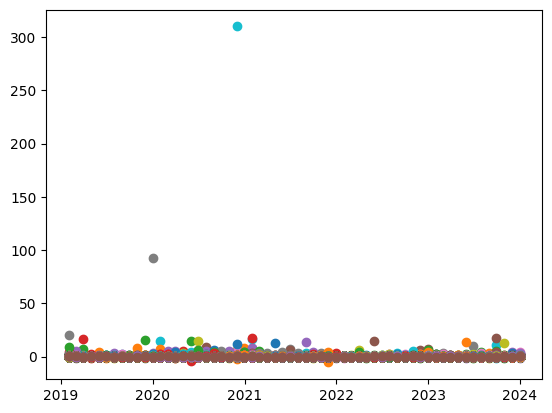

In [ ]:
import matplotlib.pyplot as plt


for i in noo_nona_month_df.columns:
  plt.scatter(x = noo_nona_month_df.index, y = noo_nona_month_df[i])
plt.show()

**After scaling.**

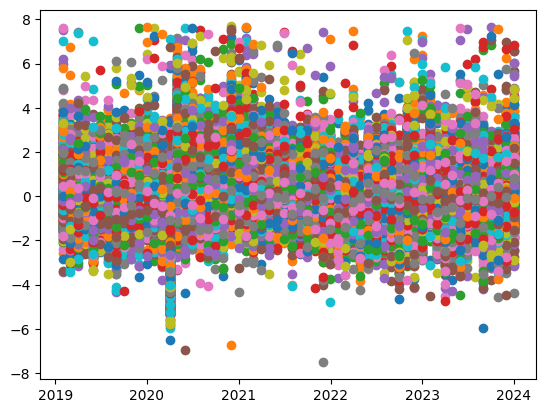

In [ ]:
import matplotlib.pyplot as plt


for i in range(len(noo_nona_month_df.columns)):
  plt.scatter(x = noo_nona_month_df.index, y = for_test[:,i])
plt.show()

**Better after scaling the data with outliers**

**CNN-LSTM**

In [ ]:
df = noo_nona_month_df
df

Ticker,A,AA,AAP,AAT,AB,ABBV,ABEV,ABG,ABM,ABR,...,ZIONO,ZIONP,ZKIN,ZLAB,ZS,ZTEK,ZUMZ,ZVRA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,0.157711,0.131098,0.008105,0.092621,0.118078,-0.089154,0.145238,0.037140,0.093031,0.174853,...,0.123282,0.023416,0.031847,0.210314,0.215021,3.666666e-01,2.951070e-01,0.318182,0.084411,0.384083
2019-02-28,0.044576,-0.006065,0.016206,0.011644,-0.024107,-0.013078,-0.058212,0.016136,0.042995,0.104780,...,-0.051326,-0.004417,-0.135802,0.067803,0.027083,-2.439022e-02,-2.794172e-02,-0.137931,-0.050847,0.240000
2019-03-31,0.011833,-0.045424,0.054471,0.062204,-0.008239,0.017037,-0.050773,-0.033849,0.019349,0.002318,...,-0.001495,0.018190,0.107143,0.023942,0.427738,-3.000000e-01,7.692252e-03,-0.257778,0.070106,-0.092742
2019-04-30,-0.021392,-0.052557,-0.024688,0.007196,0.021461,-0.001829,0.095349,0.155998,0.049621,0.053200,...,0.037065,0.041852,0.064516,-0.096916,-0.036938,3.571425e-02,6.990759e-02,-0.104790,0.177997,0.237778
2019-05-31,-0.145860,-0.205772,-0.068062,-0.017320,-0.063055,-0.033757,-0.050956,-0.074707,-0.045299,-0.079552,...,-0.017973,-0.025775,-0.163636,-0.016510,0.004685,-3.448273e-02,-2.572286e-01,0.070234,-0.002623,0.310593
2019-06-30,0.113647,0.104766,-0.005160,0.044563,0.093049,-0.052014,0.044743,0.136811,0.103448,-0.015435,...,-0.001119,-0.003185,0.031159,0.330408,0.116713,-1.785714e-01,3.195146e-01,0.093750,0.157286,0.231507
2019-07-31,-0.068397,-0.039300,-0.022707,-0.015280,0.015141,-0.069914,0.128480,0.091771,0.057021,0.005776,...,0.024645,-0.007321,-0.114547,-0.078864,0.099556,4.347822e-02,-5.095785e-02,-0.280000,0.038636,-0.074527
2019-08-31,0.024492,-0.202757,-0.084241,0.009914,-0.044450,-0.013209,-0.138520,0.024109,-0.114755,0.053707,...,0.019515,0.039046,0.206349,0.015255,-0.184289,4.166669e-02,4.884938e-02,-0.255556,0.165864,0.074519
2019-09-30,0.079945,0.119353,0.199453,0.003362,0.037836,0.151810,0.017621,0.085154,-0.025228,0.044622,...,0.000363,0.001253,-0.190789,-0.007973,-0.312482,2.000000e-01,2.193996e-01,-0.265458,-0.069069,0.063759


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler


X_train = df.iloc[:54,:]
X_test = df.iloc[54:,:]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


gen_train = TimeseriesGenerator(X_train_scaled, X_train_scaled, length=3, stride=4, batch_size=10)
gen_test = TimeseriesGenerator(X_test_scaled, X_test_scaled, length=3, stride=4, batch_size=10)

**Use a time step of 3 (3 months) to predict the fourth month, ensuring no overlapping windows to prevent data leakage.**

**Number of train samples = 60/4 * 0.9**

**Number of test samples = 60/4 * 0.1**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from sklearn.preprocessing import RobustScaler

timesteps = 3
input_dim, output_dim = 3928, 3928

model = Sequential()

model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))

model.add(LSTM(8, activation='relu', return_sequences=True))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_dim, activation='linear'))


model.compile(optimizer='adam', loss='mae')

model.fit(gen_train, epochs=200, batch_size=32)

Epoch 1/200
2/2 [==============================] - 2s 32ms/step - loss: 0.6893
Epoch 2/200
2/2 [==============================] - 0s 30ms/step - loss: 0.6901
Epoch 3/200
2/2 [==============================] - 0s 30ms/step - loss: 0.6891
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 0.6866
Epoch 5/200
2/2 [==============================] - 0s 34ms/step - loss: 0.6853
Epoch 6/200
2/2 [==============================] - 0s 30ms/step - loss: 0.6775
Epoch 7/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6752
Epoch 8/200
2/2 [==============================] - 0s 29ms/step - loss: 0.6662
Epoch 9/200
2/2 [==============================] - 0s 42ms/step - loss: 0.6717
Epoch 10/200
2/2 [==============================] - 0s 45ms/step - loss: 0.6569
Epoch 11/200
2/2 [==============================] - 0s 37ms/step - loss: 0.6557
Epoch 12/200
2/2 [==============================] - 0s 41ms/step - loss: 0.6354
Epoch 13/200
2/2 [==============================]

In [ ]:
pred_all = []
y_true = []
for x,y in gen_test:
  predictions = model.predict(x)
  pred_all.append(predictions)
  y_true.append(y)

df_pred = pd.DataFrame(np.array(pred_all).reshape(-1,3928), columns=df.columns)
df_pred

1/1 [==============================] - 0s 33ms/step


Ticker,A,AA,AAP,AAT,AB,ABBV,ABEV,ABG,ABM,ABR,...,ZIONO,ZIONP,ZKIN,ZLAB,ZS,ZTEK,ZUMZ,ZVRA,ZYME,ZYXI
0,-0.05258,-0.374499,0.285289,-0.128582,-0.424164,-0.131038,-0.106108,-0.221116,-0.518431,-0.077639,...,0.175166,0.052641,0.012268,0.091406,-0.807437,-0.304693,-0.132008,-0.120603,0.103325,-0.366252


In [ ]:
df_true = pd.DataFrame(np.array(y_true).reshape(-1,3928), columns=df.columns)
df_true

Ticker,A,AA,AAP,AAT,AB,ABBV,ABEV,ABG,ABM,ABR,...,ZIONO,ZIONP,ZKIN,ZLAB,ZS,ZTEK,ZUMZ,ZVRA,ZYME,ZYXI
0,-1.185291,-0.704289,-0.54184,-0.792141,-0.697123,-0.908254,-0.203469,-1.587581,-0.27813,-1.360748,...,-0.174582,-1.756072,-1.090793,0.0732,-0.105441,0.062634,-0.603735,-0.259219,0.638146,0.384746


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_pred.values, df_true.values)

0.7652049358806794

**Macro avage MAE equals 0.765.**

**Try using daily data with fewer stocks, as the previous dataset had limited observations.**

In [ ]:
zero_in_column = cleaned_df.eq(0).any()

columns_with_zero = zero_in_column[zero_in_column].index

noo_nona_daily_df = cleaned_df.drop(columns=columns_with_zero)
noo_nona_daily_df

,AXP,AZO,BABA,BIO,BRK-A,CABO,CAT,CMG,CRL,DDS,...,REGN,RGLD,SWKS,TEAM,TTD,TXN,ULTA,VRTX,WING,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.019519,0.008468,-0.044623,-0.016573,-0.056098,0.010856,-0.038535,-0.008819,-0.056441,-0.017863,...,-0.000967,0.006341,-0.106533,-0.051106,-0.056818,-0.058973,-0.018591,-0.002133,-0.013796,-0.059908
2019-01-04,0.045061,-0.011767,0.070061,0.008827,0.019164,0.027735,0.054646,0.035385,0.047033,0.018993,...,0.068453,-0.002238,0.047925,0.030895,0.076305,0.045230,0.047954,0.054785,0.032093,0.041462
2019-01-07,0.005428,-0.015928,0.023971,0.032659,0.009915,0.011324,0.000624,0.066264,0.025604,0.059232,...,-0.002314,-0.004722,0.013516,0.064531,0.056394,0.017223,0.062620,0.018240,0.075267,0.015166
2019-01-08,0.004889,-0.013316,0.025786,0.007960,-0.003724,0.015309,0.012010,0.025188,0.044598,0.005518,...,0.001588,0.006641,0.010854,0.022759,0.027936,-0.001270,0.018450,0.013307,0.042118,0.006697
2019-01-09,0.001825,0.011080,0.034948,0.007812,0.000883,-0.020330,0.003853,0.002232,0.003487,0.008750,...,0.005840,-0.005537,0.038349,0.010441,0.005857,0.019708,0.018804,0.023065,0.012381,0.024819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.004221,-0.001523,-0.012851,0.003661,0.002957,-0.000165,0.001000,-0.001192,0.002164,0.002006,...,0.005749,0.005007,0.005883,-0.017263,-0.038623,0.008573,-0.012797,0.011532,0.008280,0.015454
2023-12-26,0.002102,-0.015076,0.007572,0.000624,0.001907,0.014616,0.018150,0.006583,0.008212,0.019895,...,0.003319,0.007432,0.014800,0.017650,0.002179,0.015276,0.012772,0.005947,0.003099,0.022605
2023-12-27,0.005915,0.001541,0.003428,0.003770,0.000212,0.008498,0.008423,-0.005208,0.002813,0.010561,...,0.029240,0.007702,-0.000873,-0.008121,0.006659,0.002459,0.012317,0.000957,0.005483,0.001053


**157 * 8 * 75**

**141, 16**

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler


X_train_daily = noo_nona_daily_df.iloc[:1130,:]
X_test_daily = noo_nona_daily_df.iloc[1130:,:]

scaler = StandardScaler()
X_train_scaled_daily = scaler.fit_transform(X_train_daily)
X_test_scaled_daily = scaler.transform(X_test_daily)


gen_train_daily = TimeseriesGenerator(X_train_scaled_daily, X_train_scaled_daily, length=7, stride=8, batch_size=10)
gen_test_daily = TimeseriesGenerator(X_test_scaled_daily, X_test_scaled_daily, length=7, stride=8, batch_size=10)

**Use a longer time step of 7 days to predict the eighth day.**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from sklearn.preprocessing import RobustScaler

timesteps = 7
input_dim, output_dim = 75, 75

model_2 = Sequential()

model_2.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))

model_2.add(Conv1D(filters=32, kernel_size=3, activation='relu'))


model_2.add(LSTM(32, activation='relu', return_sequences=True))
model_2.add(LSTM(16, activation='relu', return_sequences=True))

model_2.add(Flatten())

model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(output_dim, activation='linear'))


model_2.compile(optimizer='adam', loss='mae')

model_2.fit(gen_train_daily, epochs=200, batch_size=32)

Epoch 1/200
15/15 [==============================] - 3s 7ms/step - loss: 0.6526
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6516
Epoch 3/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6492
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6465
Epoch 5/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6359
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6276
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6089
Epoch 8/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5787
Epoch 9/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5569
Epoch 10/200
15/15 [==============================] - 0s 8ms/step - loss: 0.5587
Epoch 11/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5506
Epoch 12/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5449
Epoch 13/200
15/15 [=================

In [ ]:
df_pred_daily = pd.DataFrame({}, columns=noo_nona_daily_df.columns)
df_true_daily = pd.DataFrame({}, columns=noo_nona_daily_df.columns)


for x,y in gen_test_daily:
  predictions_daily = model_2.predict(x)
  df_pred_daily = pd.concat([df_pred_daily, pd.DataFrame(predictions_daily, columns=noo_nona_daily_df.columns)], axis = 0)
  df_true_daily = pd.concat([df_true_daily, pd.DataFrame(y, columns=noo_nona_daily_df.columns)], axis = 0)


df_pred_daily

1/1 [==============================] - 0s 35ms/step


,AXP,AZO,BABA,BIO,BRK-A,CABO,CAT,CMG,CRL,DDS,...,REGN,RGLD,SWKS,TEAM,TTD,TXN,ULTA,VRTX,WING,ZBRA
0,-0.325762,-0.410299,0.015325,0.071666,-0.240827,-0.193958,-0.367450,-0.291508,-0.018091,-0.049543,...,-0.061902,0.095104,-0.210101,0.092627,0.032158,-0.303206,-0.292667,-0.383221,-0.126212,-0.230883
1,-0.265314,-0.364998,-0.097412,-0.003295,-0.335390,0.003856,-0.297932,-0.141699,0.087253,-0.125582,...,0.163152,0.090984,-0.013465,0.320930,0.156308,-0.121934,-0.322940,-0.095631,0.119753,-0.181660
2,0.095096,0.236872,-0.083939,0.178087,-0.058665,0.211285,0.114136,0.095966,0.121056,-0.119375,...,0.440089,-0.064249,0.344903,0.356719,-0.136415,0.322234,0.010043,0.297587,0.126898,-0.018745
3,-0.211870,0.051060,-0.136411,0.038576,-0.206406,-0.047885,-0.350962,-0.038957,-0.031856,-0.008551,...,-0.225394,0.094456,-0.369232,0.134704,-0.018952,-0.515801,-0.280538,-0.142301,-0.054157,-0.430965
4,0.040184,0.099193,0.031032,0.028364,-0.014337,-0.064050,0.050984,0.045529,0.081432,0.139235,...,-0.101833,0.142779,0.052208,0.123714,0.126367,0.006216,0.054731,-0.131279,0.033429,-0.042171
5,0.053523,-0.003607,0.051753,0.048177,-0.032067,0.052854,-0.025673,0.082664,-0.022129,0.121156,...,-0.132735,0.344898,0.080346,0.188746,0.070721,0.054483,0.006621,-0.162314,0.047167,0.000934
6,-0.220851,-0.299965,-0.068249,0.105948,-0.252905,-0.099397,-0.420877,-0.074775,0.063315,-0.037454,...,-0.068809,0.182901,-0.285095,0.260702,0.105692,-0.448690,-0.265676,-0.330750,0.002266,-0.254078
7,-0.136914,-0.041334,-0.119567,0.060325,-0.187213,-0.222314,-0.298495,-0.059342,0.053523,0.028426,...,-0.146081,0.204314,-0.200021,0.099675,0.003397,-0.215878,-0.147326,-0.240707,-0.048973,-0.110904
8,0.480358,0.525325,0.270880,0.163637,0.199227,0.549768,0.495999,0.263514,0.312815,0.510363,...,0.148542,0.057605,0.373299,0.423149,0.537188,0.515195,0.523305,0.372678,0.571245,0.655413
9,0.052631,0.124271,0.077057,0.412620,0.059483,0.145097,-0.101944,0.308922,0.237008,-0.044479,...,0.225011,0.149938,-0.218192,0.454600,0.073230,-0.144488,-0.167196,0.167069,-0.035703,0.164480


In [ ]:
df_true_daily

,AXP,AZO,BABA,BIO,BRK-A,CABO,CAT,CMG,CRL,DDS,...,REGN,RGLD,SWKS,TEAM,TTD,TXN,ULTA,VRTX,WING,ZBRA
0,-0.106724,0.375305,0.764019,0.104083,0.517484,-0.434162,0.100154,0.409094,0.493136,-1.095984,...,0.068847,1.899980,0.523803,0.102489,0.417157,0.943525,0.024983,0.572769,1.054113,0.811795
1,-0.612874,0.759327,1.440401,0.260984,0.631822,0.240607,0.277873,-0.399913,0.137238,0.669031,...,-0.527829,-0.170683,-0.158789,-0.252124,-0.595941,-0.156503,-0.457088,-0.769722,-0.470579,-0.521735
2,-0.117409,0.906829,0.837936,-0.245495,0.936738,-0.303096,-1.061527,-0.383897,-0.923078,-0.281863,...,2.541667,-0.243871,-0.590558,-0.041188,-0.528145,-0.224854,-0.238256,-1.491324,-0.469185,1.311400
3,-1.051489,-0.208055,-0.637602,-0.078100,-0.712948,-0.572281,-1.249178,-0.116441,-1.323707,-0.514835,...,-0.184355,-1.362587,-1.166865,-1.003044,-0.510023,-0.715593,-0.218294,0.014303,-0.020400,0.569100
4,0.101154,0.069703,0.251858,-0.087824,0.258685,-0.360360,0.538005,0.032056,0.329387,0.133075,...,-0.087328,-0.197230,0.382684,1.061858,0.347507,0.623924,-1.353197,0.419190,-0.426354,0.324768
5,-0.347496,0.009411,-1.509500,-0.283102,-0.004707,-0.239383,-0.290892,0.211267,-0.045258,-0.634727,...,0.365401,0.217512,-2.758547,0.039785,0.158788,-1.026306,0.705613,-0.093767,1.479336,-1.188257
6,-0.105873,-1.080645,0.031422,-0.919128,-0.005217,0.784124,-0.258521,-0.378054,-0.431660,0.190037,...,0.675701,0.049239,-0.286963,0.034704,-0.500995,0.053571,0.306861,0.823224,-0.091587,-0.191110
7,-0.315151,-0.478014,0.444552,0.259900,-1.329309,1.018787,-0.603864,-0.234326,0.105115,0.115714,...,-0.705580,-0.199785,0.234948,0.635005,0.069197,-0.065762,0.014188,-0.700461,-0.311584,-0.089430
8,0.120746,-0.182748,0.221024,-1.009650,-0.000608,0.524480,-0.108586,-0.276152,0.268028,-0.220357,...,0.026180,0.401018,-0.189266,-0.947632,-0.157903,-0.144612,-0.190750,0.589240,0.001982,-0.944012
9,0.828886,-1.286797,0.225237,-1.302046,0.172288,-1.116258,-0.403377,-0.346198,-0.953308,-0.303205,...,-0.805536,-0.777347,-0.727462,-0.203447,-0.181506,-0.540654,0.084075,0.737720,-0.316263,0.105737


In [ ]:
from sklearn.metrics import mean_absolute_error
all_mae = []
for col in noo_nona_daily_df.columns:
  all_mae.append(mean_absolute_error(df_true_daily[col], df_pred_daily[col]))


np.array(all_mae).mean()

0.6020223309864893

**Better MAE.**

In [ ]:
noo_nona_daily_df.columns[np.array(all_mae).argmin()], all_mae[np.array(all_mae).argmin()]

('NFLX', 0.29515452287627275)